# Spam Detection

In [3]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np

In [61]:
data = pd.read_csv('/Users/praga/Downloads/spambase.data.txt')

In [62]:
data.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [63]:
data.columns

Index([u'0', u'0.64', u'0.64.1', u'0.1', u'0.32', u'0.2', u'0.3', u'0.4',
       u'0.5', u'0.6', u'0.7', u'0.64.2', u'0.8', u'0.9', u'0.10', u'0.32.1',
       u'0.11', u'1.29', u'1.93', u'0.12', u'0.96', u'0.13', u'0.14', u'0.15',
       u'0.16', u'0.17', u'0.18', u'0.19', u'0.20', u'0.21', u'0.22', u'0.23',
       u'0.24', u'0.25', u'0.26', u'0.27', u'0.28', u'0.29', u'0.30', u'0.31',
       u'0.32.2', u'0.33', u'0.34', u'0.35', u'0.36', u'0.37', u'0.38',
       u'0.39', u'0.40', u'0.41', u'0.42', u'0.778', u'0.43', u'0.44',
       u'3.756', u'61', u'278', u'1'],
      dtype='object')

In [64]:
data.shape

(4600, 58)

#### Shuffle Data

In [65]:
data=data.sample(frac=1)

#### Setting target and features

In [66]:
X = data[data.columns.drop('1')]
Y = data['1']

In [67]:
X.columns

Index([u'0', u'0.64', u'0.64.1', u'0.1', u'0.32', u'0.2', u'0.3', u'0.4',
       u'0.5', u'0.6', u'0.7', u'0.64.2', u'0.8', u'0.9', u'0.10', u'0.32.1',
       u'0.11', u'1.29', u'1.93', u'0.12', u'0.96', u'0.13', u'0.14', u'0.15',
       u'0.16', u'0.17', u'0.18', u'0.19', u'0.20', u'0.21', u'0.22', u'0.23',
       u'0.24', u'0.25', u'0.26', u'0.27', u'0.28', u'0.29', u'0.30', u'0.31',
       u'0.32.2', u'0.33', u'0.34', u'0.35', u'0.36', u'0.37', u'0.38',
       u'0.39', u'0.40', u'0.41', u'0.42', u'0.778', u'0.43', u'0.44',
       u'3.756', u'61', u'278'],
      dtype='object')

In [68]:
Y.head()

2357    0
3812    0
65      1
1335    1
2642    0
Name: 1, dtype: int64

### Test Train Split

In [69]:
Xtrain = X.head(4500)
Ytrain = Y.head(4500)
Xtest = X.tail(100)
Ytest = Y.tail(100)

### Model Evaluation

In [70]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print"Classification rate for NB:", model.score(Xtest, Ytest)


Classification rate for NB: 0.72


In [71]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(Xtrain, Ytrain)
print"Classification rate for AdaBoost:", model.score(Xtest, Ytest)

Classification rate for AdaBoost: 0.95


# SMS Spam Detection

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from wordcloud import WordCloud

In [76]:
df = pd.read_csv('/Users/praga/Downloads/spam.csv', encoding='ISO-8859-1')

In [77]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Binary Encoding

In [78]:
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

### TFIDF vectorizer

In [79]:
tfidf = TfidfVectorizer(decode_error='ignore')
X = tfidf.fit_transform(df['data'])

### Count Vecotrizer

In [80]:
count_vectorizer = CountVectorizer(decode_error='ignore')
X_count = count_vectorizer.fit_transform(df['data'])

### Test Train Split

In [82]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33)
Xtrain_count, Xtest, Ytrain_count, Ytest = train_test_split(X_count, Y, test_size=0.33)


### Model Evaluation

In [84]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print"Train score:", model.score(Xtrain, Ytrain)
print"Test score:", model.score(Xtest, Ytest)

Train score: 0.965711224216448
Test score: 0.9668297988036977


In [102]:
model = MultinomialNB()
model.fit(Xtrain_count, Ytrain_count)
print"Train score:", model.score(Xtrain_count, Ytrain_count)
print"Test score:", model.score(Xtest, Ytest)

Train score: 0.993570854540584
Test score: 0.9825992387166939


In [89]:
model = AdaBoostClassifier()
model.fit(Xtrain, Ytrain)
print"Train score:", model.score(Xtrain, Ytrain)
print"Test score:", model.score(Xtest, Ytest)

Train score: 0.984998660594696
Test score: 0.9592169657422512


In [90]:
model = AdaBoostClassifier()
model.fit(Xtrain_count, Ytrain_count)
print"Train score:", model.score(Xtrain_count, Ytrain_count)
print"Test score:", model.score(Xtest, Ytest)

Train score: 0.9791052772568979
Test score: 0.9668297988036977


## Visualize the Data

In [91]:
def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

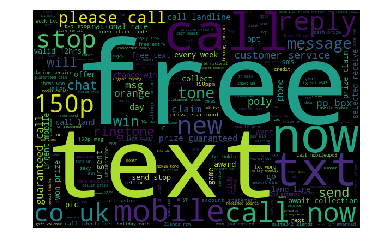

In [92]:
visualize('spam')

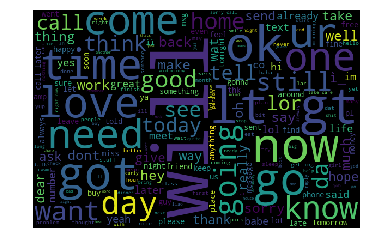

In [93]:
visualize('ham')

## What we're getting wrong

In [107]:
model = MultinomialNB()
model.fit(Xtrain_count, Ytrain_count)
df['predictions'] = model.predict(X)

In [111]:
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data'].head(3)
print'THINGS THAT SHOULD BE SPAM\n'
print'-'*25
for msg in sneaky_spam:
  print(msg)
  print'-'*25

THINGS THAT SHOULD BE SPAM

-------------------------
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
-------------------------
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
-------------------------
<Forwarded from 448712404000>Please CALL 08712404000 immediately as there is an urgent message waiting for you.
-------------------------


In [110]:
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data'].head(3)
print'THINGS THAT SHOULD NOT BE SPAM\n'
print'-'*25
for msg in not_actually_spam:
  print(msg)
  print'-'*25

THINGS THAT SHOULD NOT BE SPAM

-------------------------
\CHEERS U TEX MECAUSE U WEREBORED! YEAH OKDEN HUNNY R UIN WK SAT?SOUNDåÕS LIKEYOUR HAVIN GR8FUN J! KEEP UPDAT COUNTINLOTS OF LOVEME XXXXX.\""
-------------------------
Anytime...
-------------------------
I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
-------------------------
